In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

In [4]:
collision_train = pd.read_csv("train_data-Dell.csv")
#collision_train.info()
#collision_train.head()

In [5]:
collision_test = pd.read_csv("test_data-Dell.csv")
#collision_test.info()
#collision_test.head()

Dummy encoding converts a variable that has n possible distinct values, into n-1 binary variables. 

For regression-type problems Dummy Encoding is preferable as we wish to avoid perfect collinearity between the binary variables that are being generated by the encoding. In the classification problem however, we are not concerned about inflating factors and hence can choose either of the two schemes. They will produce equivalent encodings.

By default pd.get_dummies() does one-hot enocoding. To do dummy encoding, you need to pass the parameter drop_first=True.

In [6]:
categorical_columns = collision_train.select_dtypes(include=['object']).columns

#print("Categorical columns train:")
#print(categorical_columns)

#test
categorical_columns_test = collision_test.select_dtypes(include=['object']).columns

#print("Categorical columns test:")
#print(categorical_columns_test)


In [7]:
# Assuming collision_train is your original DataFrame
# Copy the DataFrame to avoid chained assignment issues
collision_train_copy = collision_train.copy()

# Drop rows with any NaN values
collision_train_copy.dropna(inplace=True)

# Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type = collision_train_copy['c_object_type'].mode()[0]  # Get the mode value
collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)

# Creating dummy variables
dummy_columns = pd.get_dummies(collision_train_copy['c_object_type'], prefix='c_object_type')

# Concatenating the original DataFrame with the dummy variables
new_collision_train = pd.concat([collision_train_copy, dummy_columns], axis=1)

# Dropping the original 'c_object_type' column
new_collision_train.drop('c_object_type', axis=1, inplace=True)

# Displaying the new DataFrame
print(new_collision_train)


       event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
5             1     6.530455           5  -7.561299          -7.254301   
6             1     5.561646           5  -9.315693          -7.468904   
7             1     5.226504           5  -7.422508          -7.051001   
8             1     3.570013           5  -9.248105          -7.327533   
29            3     6.950088          19  -9.568315          -7.057793   
...         ...          ...         ...        ...                ...   
70096      5638     1.441664           2 -30.000000          -5.937042   
70097      5638     1.259823           2 -30.000000          -5.936667   
70098      5638     0.852358           2 -30.000000          -5.936667   
70099      5638     0.512948           2 -30.000000          -5.934047   
70100      5638     0.228585           2 -30.000000          -6.259953   

       max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
5              2.746782         

/tmp/ipykernel_164/2765172438.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  collision_train_copy['c_object_type'].fillna(mode_c_object_type, inplace=True)


In [8]:
# Repeat the same process for the test
# Copy the DataFrame to avoid chained assignment issues
collision_test_copy = collision_test.copy()

# Drop rows with any NaN values
collision_test_copy.dropna(inplace=True)

# Replace missing values in 'c_object_type' column with the mode of non-NaN values
mode_c_object_type_test = collision_test_copy['c_object_type'].mode()[0]  # Get the mode value
collision_test_copy['c_object_type'].fillna(mode_c_object_type_test, inplace=True)

# Creating dummy variables
dummy_columns_test = pd.get_dummies(collision_test_copy['c_object_type'], prefix='c_object_type')

# Concatenating the original DataFrame with the dummy variables
new_collision_test = pd.concat([collision_test_copy, dummy_columns_test], axis=1)

# Dropping the original 'c_object_type' column
new_collision_test.drop('c_object_type', axis=1, inplace=True)

# Displaying the new DataFrame
print(new_collision_test)


       event_id  time_to_tca  mission_id       risk  max_risk_estimate  \
37            4     6.702359           5 -30.000000          -6.957818   
38            4     6.351916           5  -6.657380          -6.283746   
39            4     6.038843           5  -6.884722          -6.387534   
40            4     5.705221           5  -6.868061          -6.378408   
41            4     5.038975           5  -9.558462          -6.828566   
...         ...          ...         ...        ...                ...   
24464      2165     3.596498           2 -14.871278          -6.488518   
24465      2165     3.290859           2 -13.675101          -6.458296   
24466      2165     2.950547           2 -13.856673          -6.463442   
24467      2165     2.570998           2 -13.486516          -6.450629   
24468      2165     2.263915           2 -13.484391          -6.450751   

       max_risk_scaling  miss_distance  relative_speed  relative_position_r  \
37            88.002734        1

/tmp/ipykernel_164/1434563843.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  collision_test_copy['c_object_type'].fillna(mode_c_object_type_test, inplace=True)


In [9]:
#transform data to proper scale for train

from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
new_collision_train_scaled = scaler.fit_transform(new_collision_train)

# Convert the scaled data back to a DataFrame
new_collision_train_scaled = pd.DataFrame(new_collision_train_scaled, columns=new_collision_train.columns)


In [10]:
#transform data to proper scale for test

new_collision_test_scaled = scaler.fit_transform(new_collision_test)

# Convert the scaled data back to a DataFrame
new_collision_test_scaled = pd.DataFrame(new_collision_test_scaled, columns=new_collision_test.columns)


In [11]:
#option for test

new_collision_test_scaled = scaler.transform(new_collision_test)

new_collision_test_scaled = pd.DataFrame(new_collision_test_scaled, columns=new_collision_test.columns)

In [12]:
X_train = new_collision_train_scaled.drop(columns=['time_to_tca']).values
y_train = new_collision_train_scaled['time_to_tca'].values

In [13]:
from sklearn.ensemble import RandomForestRegressor

# Define the chunk size
chunk_size = 3  # Adjust this value according to your memory constraints

# Determine the number of chunks needed
num_chunks = len(X_train) // chunk_size + 1

# Split the data into chunks
data_splits = []
for i in range(num_chunks):
    start_idx = i * chunk_size
    end_idx = min((i + 1) * chunk_size, X_train.shape[0])
    X_chunk = X_train[start_idx:end_idx]
    y_chunk = y_train[start_idx:end_idx]
    data_splits.append((X_chunk, y_chunk))

# Now data_splits is an iterable of (X_chunk, y_chunk) pairs

# Initialize the classifier
regressor = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits:
        if len(X) == 0:  # Skip empty chunks
            continue
        regressor.fit(X, y)
        regressor.n_estimators += 1





In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
regressor = RandomForestRegressor()

# Fit the model using the training data
regressor.fit(X_train, y_train)


RandomForestRegressor()

In [15]:
X_test = new_collision_test_scaled.drop(columns=['time_to_tca']).values
y_test = new_collision_test_scaled['time_to_tca'].values

In [16]:
# Repeat the process for test
from sklearn.ensemble import RandomForestRegressor
chunk_size_test = 3
num_chunks_test = len(X_test) // chunk_size_test + 1

# Split the data into chunks
data_splits_test = []
for i in range(num_chunks_test):
    start_idx_test = i * chunk_size_test
    end_idx_test = min((i + 1) * chunk_size_test, X_test.shape[0])
    
    # Check if there are enough samples for a chunk
    if end_idx_test > start_idx_test:
        X_chunk_test = X_test[start_idx_test:end_idx_test]
        y_chunk_test = y_test[start_idx_test:end_idx_test]
        data_splits_test.append((X_chunk_test, y_chunk_test))

# Now data_splits_test is an iterable of (X_chunk, y_chunk) pairs

# Initialize the classifier
regressor_test = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits_test:
        regressor_test.fit(X, y)
        regressor_test.n_estimators += 1


# Define the chunk size
from sklearn.ensemble import RandomForestRegressor
chunk_size_test = 4
num_chunks_test = len(X_test) // chunk_size_test + 1

# Split the data into chunks
data_splits_test = []
for i in range(num_chunks_test):
    start_idx_test = i * chunk_size_test
    end_idx_test = min((i + 1) * chunk_size_test, X_test.shape[0])
    X_chunk_test = X_test[start_idx_test:end_idx_test]
    y_chunk_test = y_test[start_idx_test:end_idx_test]
    data_splits_test.append((X_chunk_test, y_chunk_test))

# Now data_splits is an iterable of (X_chunk, y_chunk) pairs

# Initialize the classifier
regressor_test = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
for _ in range(10):  # 10 passes through the data
    for X, y in data_splits_test:
        if len(X) == 0:  # Skip empty chunks
            continue
        regressor_test.fit(X, y)
        regressor_test.n_estimators += 1

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
regressor_test = RandomForestRegressor()

# Fit the model using the training data
regressor_test.fit(X_test, y_test)


In [ ]:
print('The training r_sq is: %.2f'% regressor.score(X_train, y_train))

In [15]:
print('The testing r_sq is: %.2f'% regressor_test.score(X_test, y_test))

The training r_sq is: 0.98


High R² values on the training set don't necessarily mean that the model will generalize well to unseen data. Overfitting is a concern when R² is very high on the training set but significantly lower on the test set. Therefore, while R² on the training set provides insight into the model's performance on the training data, it's essential to evaluate the model's performance on a separate test set to assess its ability to generalize to new, unseen data.

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Prediction on the training dataset
#ytrain_pred = regressor.predict(X_train)

Prediction on the testing dataset
ytest_pred = regressor_test.predict(X_test)

# The MAE
print( 'The MAE is: %.2f'% mean_absolute_error(y_train, ytrain_pred))
print( 'The MAE is: %.2f'% mean_absolute_error(y_test, ytest_pred))


The MAE is: 0.03


MAE of 0.02 suggests that your model has good predictive performance on the training set, as the average error is very small. However, it's important to note that evaluating the model's performance solely on the training set may not provide a complete picture of its effectiveness. It's essential to assess the model's performance on a separate test set to ensure that it generalizes well to unseen data.

If the MAE is also low on the test set, it indicates that the model is likely to perform well in real-world scenarios. However, if there's a significant difference in performance between the training and test sets, it may indicate issues such as overfitting or underfitting, which need to be addressed.

In [21]:
# The MSE train

#mse = mean_squared_error(y_train, ytrain_pred)
#rmse = np.sqrt(mse)

# The MSE test
mse_test = mean_squared_error(y_test, ytest_pred)
rmse_test = np.sqrt(mse_test)

#print('The MSE of train is: %.2f' % mse)
#print('The RMSE of train is: %.2f' % rmse)

print('The MSE of test is: %.4f' % mse_test)
print('The RMSE of test is: %.2f' % rmse_test)

The MSE of test is: 0.0014
The RMSE of test is: 0.04


The RMSE (Root Mean Squared Error) of 0.03 represents the square root of the MSE, providing an interpretation of the error in the same units as the target variable. A RMSE of 0.03 suggests that, on average, the model's predictions are off by approximately 0.03 units from the actual values in the training data.

Overall, while a perfect MSE and a low RMSE indicate good performance on the training set, it's crucial to evaluate the model's performance on a separate testing set to ensure it generalizes well to unseen data and to detect any potential issues such as overfitting.

In [22]:
# The EVS
#print('The EVS is: %.2f'% explained_variance_score(y_train, ytrain_pred))
print('The EVS of the test is: %.2f'% explained_variance_score(y_test, ytest_pred))

The EVS of the test is: 0.98


An Explained Variance Score (EVS) 
In this case, an EVS of 0.99 suggests that the model's predictions are highly accurate and explain almost all of the variance in the target variable.

In [ ]:
#train set
#import matplotlib.pyplot as plt

# Initialize the classifier
#regressor = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
#for _ in range(10):  # 10 passes through the data
    #for X, y in data_splits:
        #regressor.fit(X, y)
        #regressor.n_estimators += 1

# Get feature importances from the trained Random Forest model
feature_importances = regressor.feature_importances_

# Get feature names
#feature_names = new_collision_train_scaled.drop(columns=['time_to_tca']).columns

# Plotting feature importances with feature names
#plt.figure(figsize=(10, 6))
#plt.bar(range(len(feature_importances)), feature_importances, align='center')
#plt.xticks(range(len(feature_importances)), feature_names, rotation=90)  # Set x-axis labels to feature names
#plt.xlabel('Features')
#plt.ylabel('Importance')
#plt.title('Random Forest Feature Importances')
#plt.tight_layout()
#plt.show()


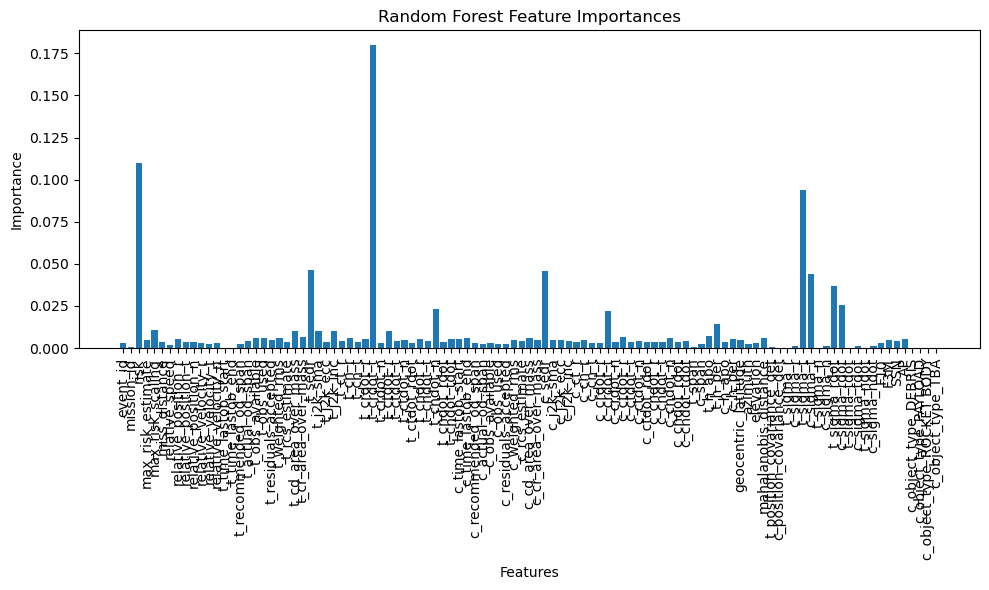

In [23]:
import matplotlib.pyplot as plt

# Initialize the classifier
#regressor_test = RandomForestRegressor(warm_start=True, n_estimators=1)

# Training loop
#for _ in range(10):  # 10 passes through the data
    #for X, y in data_splits:
        #regressor.fit(X, y)
        #regressor.n_estimators += 1

# Get feature importances from the trained Random Forest model
feature_importances_test = regressor_test.feature_importances_

# Get feature names
feature_names_test = new_collision_test_scaled.drop(columns=['time_to_tca']).columns

# Plotting feature importances with feature names
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances_test)), feature_importances_test, align='center')
plt.xticks(range(len(feature_importances_test)), feature_names_test, rotation=90)  # Set x-axis labels to feature names
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()
